In [25]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session



/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [26]:
# 파일 쓰기 : pd.to_csv()
# 파일 읽기 : _변수이름 = pd.read_csv("_경로_파일명")
train = pd.read_csv("/kaggle/input/titanic/train.csv")   #학습용도
test =  pd.read_csv("/kaggle/input/titanic/test.csv")    #실제 문제
sub = pd.read_csv("/kaggle/input/titanic/gender_submission.csv")     #답안지

train.shape, test.shape, sub.shape

((891, 12), (418, 11), (418, 2))

In [27]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [28]:
train.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [29]:
test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [30]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [31]:
sub.describe()

,PassengerId,Survived
count,418.000000,418.000000
mean,1100.500000,0.363636
std,120.810458,0.481622
min,892.000000,0.000000
25%,996.250000,0.000000
50%,1100.500000,0.000000
75%,1204.750000,1.000000
max,1309.000000,1.000000


In [32]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [33]:
train.describe(include='O')  #영문O , 숫자아닌것도 보여즘

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


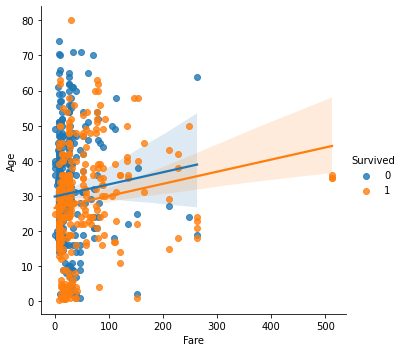

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.lmplot(x="Fare", y ="Age", hue="Survived", data=train)
plt.show()

In [36]:
train.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


<AxesSubplot:>

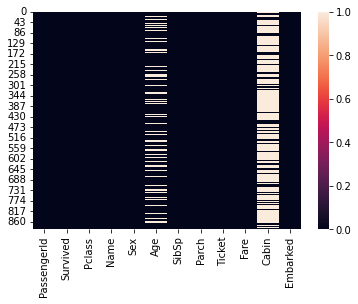

In [38]:
sns.heatmap(train.isnull())

<AxesSubplot:xlabel='Survived', ylabel='count'>

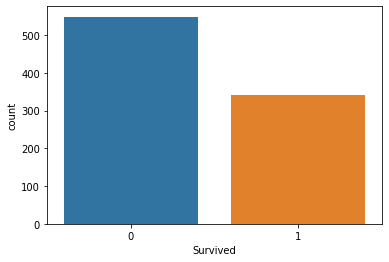

In [40]:
#생존자 수
sns.countplot(x='Survived',data=train)

<AxesSubplot:xlabel='Pclass', ylabel='count'>

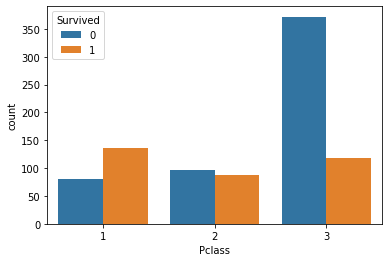

In [50]:
# Pclass 생존자수
sns.countplot(x='Pclass', hue = 'Survived', data = train)

<AxesSubplot:xlabel='Pclass', ylabel='count'>

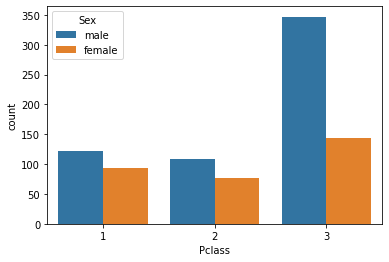

In [49]:

sns.countplot(x='Pclass', hue = 'Sex', data = train)

<AxesSubplot:xlabel='Sex', ylabel='count'>

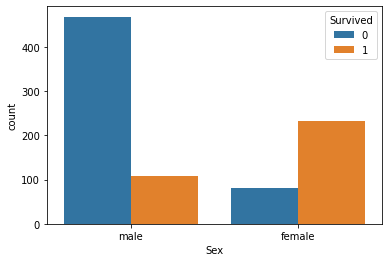

In [43]:
#성별 생존자
sns.countplot(x="Sex", hue = "Survived", data = train)

<AxesSubplot:xlabel='Age', ylabel='Count'>

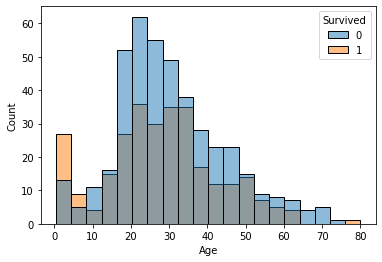

In [56]:
#히스토그램 x축에 수치입력 <->일반 막대그래프
sns.histplot(x="Age", hue="Survived", data=train)

<AxesSubplot:xlabel='Age', ylabel='Count'>

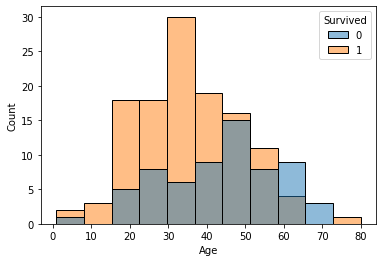

In [58]:
#가설 : 나이에 생존율

train_p1 = train[train["Pclass"]==1]
train_p2 = train[train["Pclass"]==2]
train_p3 = train[train["Pclass"]==3]

sns.histplot(x="Age", hue ="Survived", data = train_p1)

<AxesSubplot:xlabel='Age', ylabel='Count'>

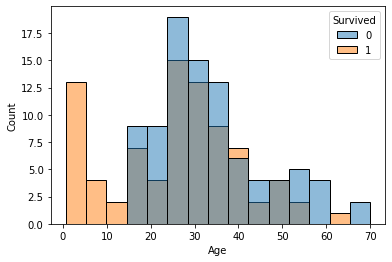

In [59]:

sns.histplot(x="Age", hue ="Survived", data = train_p2)

<AxesSubplot:xlabel='Age', ylabel='Count'>

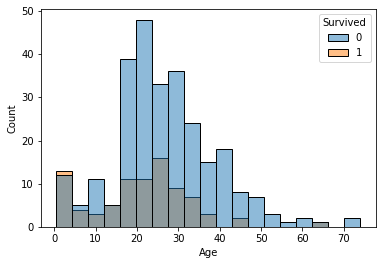

In [60]:
sns.histplot(x="Age", hue ="Survived", data = train_p3)

In [61]:
train_p1.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

<AxesSubplot:xlabel='Age', ylabel='Count'>

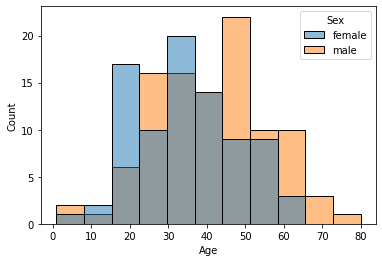

In [62]:
sns.histplot(x="Age", hue="Sex",data=train_p1)

<AxesSubplot:xlabel='Age', ylabel='Count'>

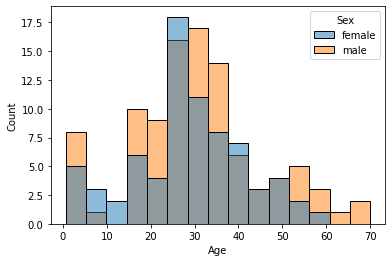

In [63]:
sns.histplot(x="Age", hue="Sex",data=train_p2)

<AxesSubplot:xlabel='Age', ylabel='Count'>

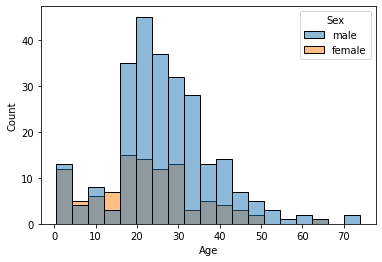

In [64]:
sns.histplot(x="Age", hue="Sex",data=train_p3)

In [ ]:
## sns.countplot : x축 존재. y(데이터 개수) - 막대그래프
## sns.boxplot : 박스 플롯. 최대값, 최소값, 중앙값, 이상치, 25%, 75%
## sns.lmplot(x='', y='', data=__)
## sns.lmplot(x='', y='', hue='',  ,data=__)
## sns.pairplot() :그래프 여러개(하나의 변수와 다른 변수의 상관관계보기)
## sns.heatmap()
## sns.histplot()   : 히스토그램(수치형 컬럼에 대한 분포 등을 확인)
## sns.barplot()    : 막대그래프 - x는 범주형, y는 그 값의 평균

<AxesSubplot:xlabel='Embarked', ylabel='count'>

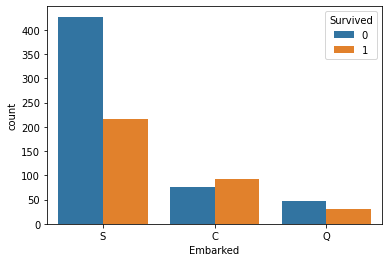

In [65]:
#Embarked 영향 : 승선항구

sns.countplot(x="Embarked", hue="Survived", data = train)

<AxesSubplot:xlabel='Embarked', ylabel='count'>

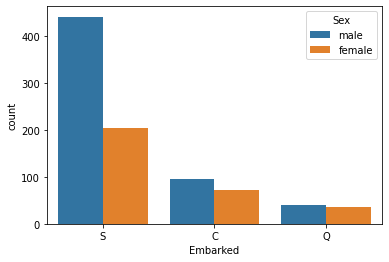

In [71]:
sns.countplot(hue="Sex", x="Embarked", data = train)

<AxesSubplot:xlabel='Embarked', ylabel='count'>

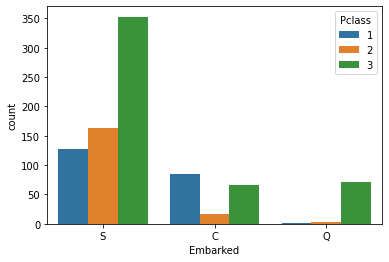

In [74]:
sns.countplot(x="Embarked", hue="Pclass", data = train)

<AxesSubplot:xlabel='Pclass', ylabel='Fare'>

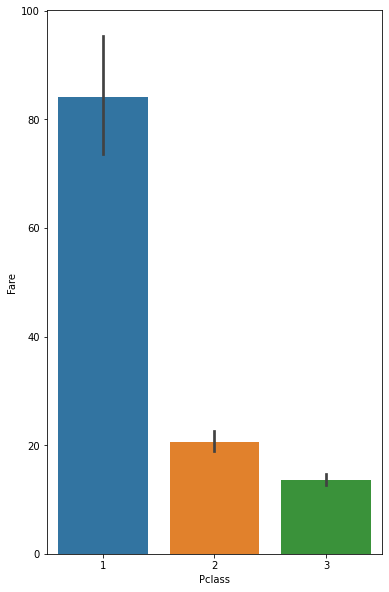

In [104]:
plt.figure(figsize=(6,10))
sns.barplot(x="Pclass", y="Fare", data = train)

In [88]:
train_age_none = train[train["Age"].isnull()]
train_age_none

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
859,860,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.2292,NaN,C
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S
868,869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,NaN,S
878,879,0,3,"Laleff, Mr. Kristo",male,NaN,0,0,349217,7.8958,NaN,S


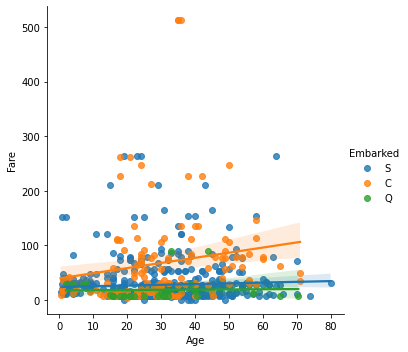

In [98]:
sns.lmplot(x="Age",y="Fare",hue="Embarked",data=train)

<AxesSubplot:>

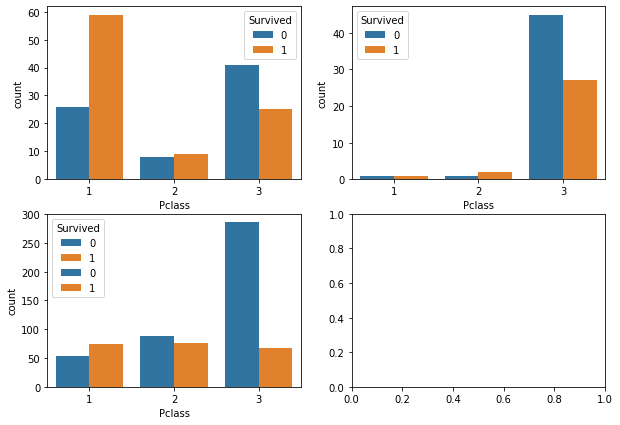

In [103]:
import matplotlib.pyplot as plt

train_C = train[train['Embarked']=='C']   # 데이터에서 Embarked:C만 가져오기
train_Q = train[train['Embarked']=='Q']   # 데이터에서 Embarked:Q만 가져오기
train_S = train[train['Embarked']=='S']   # 데이터에서 Embarked:S만 가져오기

plt.figure(figsize=(10,7))
plt.subplot(2,2,1)
sns.countplot(x='Pclass', hue='Survived', data=train_C)

plt.subplot(2,2,2)
sns.countplot(x='Pclass', hue='Survived', data=train_Q)

plt.subplot(2,2,3)
sns.countplot(x='Pclass', hue='Survived', data=train_S)

sns.countplot(x='Pclass', hue='Survived', data=train_S)
plt.subplot(2,2,4)